[]

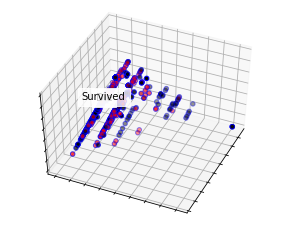

In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


def simplify_ages(df):
    df.Age = df.Age.fillna(-0.5)
    return df

def drop_features(df):
    return df.drop(['Sex','Fare', 'Pclass','Cabin','Ticket', 'Name' , 'Embarked' ], axis=1)


def transform_features(df):
    df = simplify_ages(df)
    df = drop_features(df)
    return df

data_train = pd.read_csv('1-python-basic.csv')
data_train = transform_features(data_train)


X_all = data_train.drop(['Survived', 'PassengerId'], axis=1)
y_all = data_train['Survived']

y = data_train['Survived']

pca = PCA(n_components=3)
pca.fit(X_all)
np.random.seed(10)
X = pca.transform(X_all)
fig = plt.figure(1, figsize=(4,3))
plt.clf()
ax = Axes3D(fig,rect=[0,0,0.95,1], elev=48, azim=24)
plt.cla()

for name,label in [('Die',0),('Survived',1)]:
    ax.text3D(X[y==label,0].mean()+1.5,
              X[y==label,1].mean()-0.5,
              X[y==label,2].mean(),
              name,
              horizontalalignment='center',
              bbox=dict(alpha=0.8,edgecolor='w', facecolor='w'))
y = np.choose(y, [1,0]).astype(np.float)
ax.scatter(X[:,0], X[:,1], X[:,2], c= y , cmap=plt.cm.flag, edgecolor='b')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

